### LINEAR REGRESSION

In [94]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [95]:
#loading dataset
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
missing_values=df.isnull().sum()/len(df)*100

In [97]:
#Droping Missing Values

del_cols=[]
for i in range(len(missing_values)):
    if missing_values[i] > 50.0:    # Columns : Alley, PoolQC, Fence, MiscFeature
        print("{} has {:.2f}% missing values".format(df.columns[i],missing_values[i]))
        del_cols.append(df.columns[i])
        
        

Alley has 93.77% missing values
PoolQC has 99.52% missing values
Fence has 80.75% missing values
MiscFeature has 96.30% missing values


In [98]:
del_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [99]:
df.drop(del_cols, inplace=True,axis=1)

In [100]:
#Dropping ID as its unique for all the rows
df.drop("Id",inplace=True,axis=1)

In [101]:
#Finding the number of NA in the columns

pd.set_option('display.max_rows', 500)
df.isnull().sum().head()

MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
Street           0
dtype: int64

##### We find that there are 690 and 259 NA's in FireplaceQu and LotFrontage. Removing rows with NA will remove valuable data, so instead we remove these columns as it wont be helpful for prediction


In [102]:
df.drop(columns=['FireplaceQu','LotFrontage'], inplace=True)

In [103]:
def imputer(dataset):
    for col in dataset.columns:
        
        if dataset[col].dtypes=='object':
            dataset[col].fillna(dataset[col].mode()[0],inplace=True)
        elif dataset[col].dtypes=='int64' or dataset[col].dtypes=='float64':
            dataset[col].fillna(dataset[col].mean(),inplace=True)            

    return dataset

In [104]:
df=imputer(df)

Skew is: 1.8828757597682129


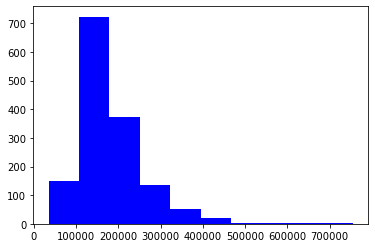

In [105]:
#Correcting the Skewness of data

print ("Skew is:", df.SalePrice.skew())
plt.hist(df.SalePrice, color='blue')
plt.show()

Skew is: 0.12133506220520406


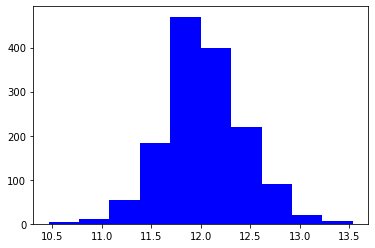

In [106]:
target = np.log(df.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [107]:
X = df.drop(['SalePrice'],axis = 1)
Y= df[ 'SalePrice']

In [108]:
tdf=df[['MSSubClass','MSZoning','HouseStyle','YearRemodAdd','CentralAir','GarageType','SaleCondition','GarageCars']]
from sklearn.preprocessing import LabelEncoder

In [109]:
col=['MSZoning','HouseStyle','CentralAir','GarageType','SaleCondition']
for col in col:
    le = LabelEncoder()
    tdf[col] = le.fit_transform(tdf[col])

<ipython-input-109-e3404657a012>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf[col] = le.fit_transform(tdf[col])


In [110]:
tdf

,MSSubClass,MSZoning,HouseStyle,YearRemodAdd,CentralAir,GarageType,SaleCondition,GarageCars
0,60,3,5,2003,1,1,4,2
1,20,3,2,1976,1,1,4,2
2,60,3,5,2002,1,1,4,2
3,70,3,5,1970,1,5,0,3
4,60,3,5,2000,1,1,4,3
...,...,...,...,...,...,...,...,...
1455,60,3,5,2000,1,1,4,2
1456,20,3,2,1988,1,1,4,2
1457,70,3,5,2006,1,1,4,1
1458,20,3,2,1996,1,1,4,1


#### Creating new features

In [111]:
#Feature 1
tdf['Total_area']=df['1stFlrSF']+df['2ndFlrSF']+df['TotalBsmtSF']

<ipython-input-111-240f48fa47a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['Total_area']=df['1stFlrSF']+df['2ndFlrSF']+df['TotalBsmtSF']


In [112]:
#Feature 2
MonYear=[]

ylist=list(df['YrSold'])
mlist=list(df['MoSold'])
for i in range(len(ylist)):
    MonYear.append(int(str(ylist[i]) + ((2 - len(str(mlist[i])))*'0') + str(mlist[i])))
    
tdf['MonYearSold']=MonYear

<ipython-input-112-05266d06d8aa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['MonYearSold']=MonYear


In [113]:
#feature 3
GarageAgeArea=[]

ylist=list(df['GarageArea'])
mlist=list(df['GarageYrBlt'].astype(int))
for i in range(len(ylist)):
     GarageAgeArea.append(int(str(ylist[i])+str(mlist[i])))
    
tdf['GarageAgeArea']=GarageAgeArea  

<ipython-input-113-302602ecc0c1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['GarageAgeArea']=GarageAgeArea


In [114]:
#feature 4

tdf['house_Condn']=df['OverallQual']+df['OverallCond']

<ipython-input-114-00acc455e608>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['house_Condn']=df['OverallQual']+df['OverallCond']


In [115]:
#feature 5
tdf['Outdoor_area']=df['WoodDeckSF']+df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']+df['PoolArea']


<ipython-input-115-7a3e7ec12ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['Outdoor_area']=df['WoodDeckSF']+df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']+df['PoolArea']


In [116]:
tdf

,MSSubClass,MSZoning,HouseStyle,YearRemodAdd,CentralAir,GarageType,SaleCondition,GarageCars,Total_area,MonYearSold,GarageAgeArea,house_Condn,Outdoor_area
0,60,3,5,2003,1,1,4,2,2566,200802,5482003,12,61
1,20,3,2,1976,1,1,4,2,2524,200705,4601976,14,298
2,60,3,5,2002,1,1,4,2,2706,200809,6082001,12,42
3,70,3,5,1970,1,5,0,3,2473,200602,6421998,12,307
4,60,3,5,2000,1,1,4,3,3343,200812,8362000,13,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,5,2000,1,1,4,2,2600,200708,4601999,11,40
1456,20,3,2,1988,1,1,4,2,3615,201002,5001978,12,349
1457,70,3,5,2006,1,1,4,1,3492,201005,2521941,16,60
1458,20,3,2,1996,1,1,4,1,2156,201004,2401950,11,478


In [117]:
x=tdf.values
y=Y.values

Feature: 0, Score: -79.60351
Feature: 1, Score: -6786.05805
Feature: 2, Score: 1543.15308
Feature: 3, Score: 353.14191
Feature: 4, Score: -1825.14140
Feature: 5, Score: -2842.30482
Feature: 6, Score: 3940.62219
Feature: 7, Score: 23726.56504
Feature: 8, Score: 46.28909
Feature: 9, Score: -6.85539
Feature: 10, Score: -0.00014
Feature: 11, Score: 10106.89541
Feature: 12, Score: 24.59687


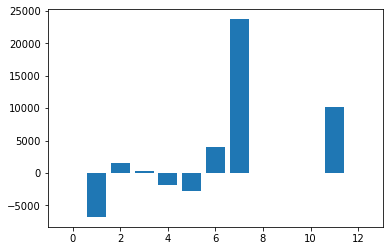

In [118]:
#Feature Importance
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### We see that Feature8 (MonYearSold) and feature 9 (GarageAgeArea) can be avoided.

In [79]:

tdf.drop(columns=['MonYearSold', 'GarageAgeArea'], inplace=True, axis=1)

G:\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [80]:
tdf.columns

Index(['MSSubClass', 'MSZoning', 'HouseStyle', 'YearRemodAdd', 'CentralAir',
       'GarageType', 'SaleCondition', 'GarageCars', 'Total_area',
       'house_Condn', 'Outdoor_area'],
      dtype='object')

In [81]:
#Computing values of x and y again with new features
x=tdf.values
y=Y.values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [83]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [84]:
y_pred = regressor.predict(X_test)

In [85]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,200624,260280.403249
1,133000,152755.933840
2,110000,84702.839350
3,192000,230205.517558
4,88000,77546.873454
5,85000,109618.444917
6,282922,253989.296289
7,141000,119745.073735
8,745000,472184.262563
9,148800,146820.671152


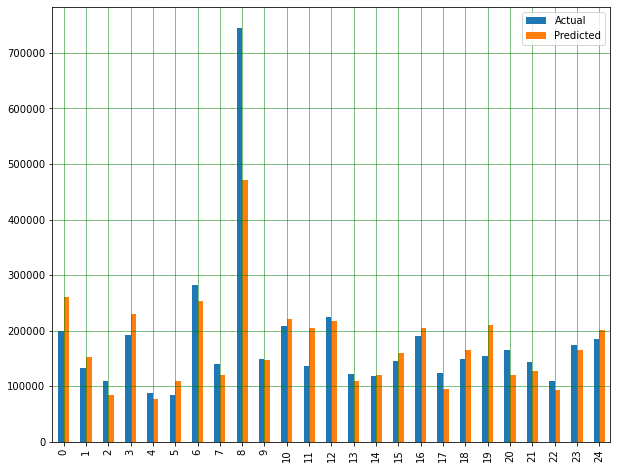

In [86]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 27242.52696135638
Mean Squared Error: 2625551717.6063013
Root Mean Squared Error: 51240.137759439145
R-squared Error: 0.6198075933749108


In [88]:
ymean=y_test.mean()
(55902.76175725574/ymean)*100

30.82243123682628

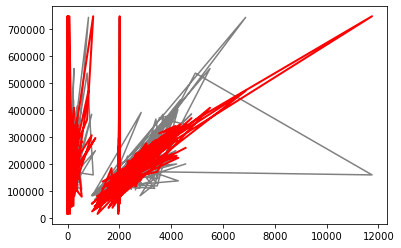

In [89]:
plt.plot(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### SVM REGRESSION

In [35]:
from sklearn.svm import SVR

In [36]:
svrs = [SVR(kernel='linear', gamma='scale'), SVR(kernel='poly', gamma='scale'), SVR(kernel='rbf', gamma='scale')]

In [37]:
for model in svrs:
    model.fit(X_train,y_train)

In [38]:
scores=[rg.score(X_test, y_test) for rg in svrs]
scores

[0.5261393785763977, -0.03225194737023296, -0.04765434724666373]

### RANDOM FOREST REGRESSOR

In [39]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf_base = RandomForestRegressor(n_estimators=400)

In [40]:
from sklearn import metrics

rf_base.fit(X_train, y_train)
y_pred_rf_base = rf_base.predict(X_test)

In [41]:
rf_base.score(X_train, y_train)

0.9759449138888879